# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#daily 7 day forecast API


In [2]:
#weather_api_key


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

611

In [64]:
#print(city)

In [65]:
#print(cities_list) #print a list of the cities_list

In [66]:
# this is your api url link, we fill it in below. 
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [67]:
base_url= "http://api.openweathermap.org/data/2.5/weather?"
#city_one= "Denver"

query_url= base_url+ "appid="+weather_api_key+ "&q=" + city
print(query_url) #click on this url and put into Google.


http://api.openweathermap.org/data/2.5/weather?appid=bc6b9a82441f1910d9054de33f421ceb&q=busselton


In [68]:
#query_url='api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
#query_url

weather_response=requests.get(query_url)
weather_json=weather_response.json()
#pprint(f'The weather API responded with: {weather_json}.')

pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.65, 'lon': 115.3333},
 'dt': 1611980605,
 'id': 2075265,
 'main': {'feels_like': 300.28,
          'humidity': 39,
          'pressure': 1015,
          'temp': 301.27,
          'temp_max': 302.59,
          'temp_min': 298.15},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2008303,
         'sunrise': 1611956311,
         'sunset': 1612005910,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 54, 'gust': 6.26, 'speed': 2.68}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
#below is the base URL to access the openweather api data. Remove all data after ? 

#base_url= "http://api.openweathermap.org/data/2.5/weather?"


# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#create empty list for your eventual dataframe
city_list_500=[]
lat_500=[]
long_500=[]
max_temp_500=[]
humidity_500=[]
wind_speed_500=[]
cloudiness_500=[]
country_500=[]
date_500=[]
counter=0
group=1



#[:3] gives me back 3 results from the cities_list. 
# for loop itreeather list of randomeng enerrate scitis, pings the opena 
for each_city in cities_list[:]: 
    #query_url= base_url+ "appid="+weather_api_key+ "&q=" + city
    query_url=f'{base_url}q={each_city}&appid={weather_api_key}'
    weather_response=requests.get(query_url)
    weather_data=weather_response.json()
    counter= counter +1
    
    #pprint(weather_data) #keep this in the for loop so that it prints out the amount you want
    try:
        city_list_500.append(weather_data['name'])
        lat_500.append(weather_data['coord']['lat'])
        #print(lat_500)
        long_500.append(weather_data['coord']['lon'])
        max_temp_500.append(weather_data['main']['temp_max'])
        humidity_500.append(weather_data['main']['humidity'])
        cloudiness_500.append(weather_data['clouds']['all'])
        wind_speed_500.append(weather_data['wind']['speed'])
        country_500.append(weather_data['sys']['country'])
        date_500.append(weather_data['dt'])
        if counter >50:
            counter=1
            group=1 +group
        #print(f" Processing record number {len(city_list_500)} for the city of {each_city}")
        print(f" Processing record number {counter} for Set {group} the city of {each_city}")
        
    except:
        print('City not found. Skipping...')
        pass

    # need to print out 50 and then new list shows up. look at starter file
    # hint: these are counters
    # 

# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(wind_speed_500)
# print(cloudiness_500)
# print(country_500)
# print(date_500)


 Processing record number 1 for Set 1 the city of port alfred
 Processing record number 2 for Set 1 the city of albany
 Processing record number 3 for Set 1 the city of mehamn
 Processing record number 4 for Set 1 the city of santa cruz de tenerife
 Processing record number 5 for Set 1 the city of suzuka
 Processing record number 6 for Set 1 the city of walvis bay
 Processing record number 7 for Set 1 the city of yellowknife
 Processing record number 8 for Set 1 the city of hobart
 Processing record number 9 for Set 1 the city of tahoua
 Processing record number 10 for Set 1 the city of margate
 Processing record number 11 for Set 1 the city of coquimbo
 Processing record number 12 for Set 1 the city of rikitea
 Processing record number 13 for Set 1 the city of ushuaia
 Processing record number 14 for Set 1 the city of new norfolk
City not found. Skipping...
 Processing record number 16 for Set 1 the city of alice springs
 Processing record number 17 for Set 1 the city of pisco
 Proces

 Processing record number 41 for Set 3 the city of verkhoyansk
 Processing record number 42 for Set 3 the city of naze
 Processing record number 43 for Set 3 the city of irbil
 Processing record number 44 for Set 3 the city of nevelsk
 Processing record number 45 for Set 3 the city of thinadhoo
 Processing record number 46 for Set 3 the city of ipil
 Processing record number 47 for Set 3 the city of bengkulu
 Processing record number 48 for Set 3 the city of areosa
 Processing record number 49 for Set 3 the city of maceio
 Processing record number 50 for Set 3 the city of riyadh
 Processing record number 1 for Set 4 the city of bataipora
 Processing record number 2 for Set 4 the city of guilin
City not found. Skipping...
 Processing record number 4 for Set 4 the city of port elizabeth
 Processing record number 5 for Set 4 the city of ferrol
 Processing record number 6 for Set 4 the city of mandalgovi
 Processing record number 7 for Set 4 the city of cidreira
City not found. Skipping...

 Processing record number 37 for Set 6 the city of zavodouspenskoye
 Processing record number 38 for Set 6 the city of yerbogachen
 Processing record number 39 for Set 6 the city of nikolskoye
 Processing record number 40 for Set 6 the city of diu
 Processing record number 41 for Set 6 the city of port hedland
 Processing record number 42 for Set 6 the city of kaeo
 Processing record number 43 for Set 6 the city of buala
 Processing record number 44 for Set 6 the city of los llanos de aridane
 Processing record number 45 for Set 6 the city of itagi
 Processing record number 46 for Set 6 the city of mamallapuram
 Processing record number 47 for Set 6 the city of koslan
 Processing record number 48 for Set 6 the city of mananjary
 Processing record number 49 for Set 6 the city of vitim
 Processing record number 50 for Set 6 the city of codrington
 Processing record number 1 for Set 7 the city of khorixas
 Processing record number 2 for Set 7 the city of north bend
 Processing record numb

 Processing record number 27 for Set 9 the city of tuatapere
 Processing record number 28 for Set 9 the city of turbat
 Processing record number 29 for Set 9 the city of sandwich
 Processing record number 30 for Set 9 the city of gardner
 Processing record number 31 for Set 9 the city of brody
 Processing record number 32 for Set 9 the city of ibiruba
 Processing record number 33 for Set 9 the city of pervomayskoye
City not found. Skipping...
 Processing record number 35 for Set 9 the city of acajutla
 Processing record number 36 for Set 9 the city of ribeira grande
City not found. Skipping...
 Processing record number 38 for Set 9 the city of nantucket
 Processing record number 39 for Set 9 the city of totskoye
City not found. Skipping...
 Processing record number 41 for Set 9 the city of marystown
 Processing record number 42 for Set 9 the city of kutum
City not found. Skipping...
 Processing record number 44 for Set 9 the city of villa guerrero
 Processing record number 45 for Set 9

 Processing record number 21 for Set 12 the city of oksfjord
 Processing record number 22 for Set 12 the city of belmonte
 Processing record number 23 for Set 12 the city of mosna
 Processing record number 24 for Set 12 the city of wanaka
 Processing record number 25 for Set 12 the city of tygda
 Processing record number 26 for Set 12 the city of luneburg
 Processing record number 27 for Set 12 the city of molina
 Processing record number 28 for Set 12 the city of greystones
 Processing record number 29 for Set 12 the city of norman wells
 Processing record number 30 for Set 12 the city of sobolevo
 Processing record number 31 for Set 12 the city of lazaro cardenas
 Processing record number 32 for Set 12 the city of felipe carrillo puerto
City not found. Skipping...
 Processing record number 34 for Set 12 the city of tessalit
 Processing record number 35 for Set 12 the city of kuvandyk
 Processing record number 36 for Set 12 the city of antofagasta
 Processing record number 37 for Set 

In [70]:
len(city_list_500)

570

In [71]:
# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(wind_speed_500)
# print(cloudiness_500)
# print(country_500)
# print(date_500)

# # highlight them all and hit command ? to comment these
# #

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
#create a dictionary and then pass to data frame 

# how can we run the API calls so that the output is equal to 500.

# is there a way to set = to 500?

weather_data_dict= {'City': city_list_500,
                       'Latitude': lat_500,
                       'Longitude': long_500,
                       'Max Temp': max_temp_500,
                       'Humidity': humidity_500,
                       'Cloudiness': cloudiness_500,
                       'Wind Speed': wind_speed_500,
                       'Country' : country_500,
                       'Date': date_500
                      }
weather_data_df_zero=pd.DataFrame(weather_data_dict)
weather_data_df_zero.head()

#export the city data into a .csv


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,292.59,83,10,3.13,ZA,1611980608
1,Albany,42.6001,-73.9662,260.37,50,3,1.34,US,1611980400
2,Mehamn,71.0357,27.8492,269.52,96,100,8.58,NO,1611980609
3,Santa Cruz de Tenerife,28.4682,-16.2546,289.82,39,0,3.09,ES,1611980609
4,Suzuka,34.8833,136.5833,280.15,60,75,7.72,JP,1611980609


In [73]:
#print a describe table for the weather data frame
# the df_zero is the original dict we are using to run the API calls 
weather_data_df_zero.describe()

# you are getting the same count 


,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.208242,17.555579,282.183772,74.221053,52.947368,3.645456,1.611981e+09
std,33.968536,88.721234,18.489126,19.396435,39.934622,2.531264,7.137854e+01
min,-54.800000,-175.200000,231.380000,10.000000,0.000000,0.090000,1.611980e+09
25%,-9.176525,-58.715150,270.795000,65.000000,5.250000,1.640000,1.611981e+09
50%,22.271800,23.881300,288.585000,79.500000,63.500000,3.090000,1.611981e+09
75%,49.254150,88.083350,296.150000,88.000000,91.000000,4.930000,1.611981e+09
max,78.218600,179.316700,315.150000,100.000000,100.000000,15.430000,1.611981e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
# create a filter to filter out cities that have humidity >100%
# weather_data_one applies the humidity filter to weather_data_df_zero
humidity_filter=weather_data_df_zero.loc[:, "Humidity"]<=100 
weather_data_df_one=weather_data_df_zero.loc[humidity_filter,:]
#.loc[ is saying grab all the rows and the humidity coul]
#humidity_filter
#weather_data_df_one.describe() #weather data_df_one is cities with less than or equal to 100% humidity
weather_data_df_one.describe()

#another way to get a filter, different syntax

#print_me=weather_data_df_zero.loc[weather_data_df_zero['Humidity']<=100]
#print_me #no comma : it assumes you want all the columns

weather_data_df_one.to_csv("weather_data_one.csv")

In [75]:
len(weather_data_df_one)


570

In [76]:
# Get the indices of cities that have humidity over 100%.
humidity_over_filter=weather_data_df_zero.loc[:, 'Humidity']>100
weather_over_df=weather_data_df_zero.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index
# there are no indicies over 100
# you can do this through itterrows


Int64Index([], dtype='int64')

In [77]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [78]:
#The first requirement is to create a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

#After each plot, add a sentence or two explaining what the code is analyzing.

In [79]:
# These are notes only, no lines of code in this cell

# In the spherical system, horizontal lines, or east–west lines, are lines of equal latitude, or parallels. 
# Vertical lines, or north–south lines, are lines of equal longitude, or meridians. 
# These lines encompass the globe and form a gridded network called a graticule

# It may be helpful to equate longitude values with X and latitude values with Y.
# Data defined on a geographic coordinate system is displayed as if a degree is a linear unit of measure.

# Latitude and longitude values are traditionally measured either in decimal degrees or in degrees, minutes, and seconds (DMS).

# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. 
# If the prime meridian is at Greenwich, then Australia, which is south of the equator and east of Greenwich, has positive longitude values and negative latitude values.

 This sample shows as one moves closer to the equator the temperature increases.
 This is because of less sunlight the further away one goes from the equator.


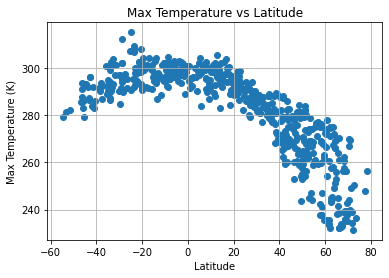

In [80]:
# Scatter plot of max temp vs latitude for weather data after filtering out cities with humidity >100
x_lat=weather_data_df_one['Latitude']
y_maxtemp=weather_data_df_one['Max Temp']

plt.scatter(x_lat, y_maxtemp)
plt.title("Max Temperature vs Latitude") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Temperature.png')

print(f' This sample shows as one moves closer to the equator the temperature increases.') 
print(f' This is because of less sunlight the further away one goes from the equator.')
#      Can you name all the countries on the equator?')

## Latitude vs. Humidity Plot

 This sample shows consistent humidity levels around the globe for most cities.
 There appear to be outliers. We could plot a boxplot to check for outliers.
 There world could not survive without humidity


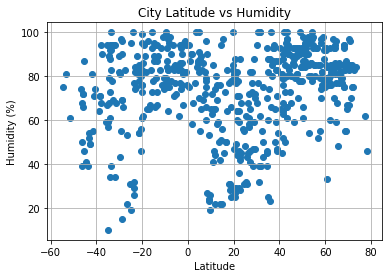

In [81]:
x_lat=weather_data_df_one['Latitude']
y_humidity=weather_data_df_one['Humidity']

plt.scatter(x_lat, y_humidity)
#plt.scatter(x_lat, y_maxtemp)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Humidity.png')

print(f' This sample shows consistent humidity levels around the globe for most cities.')
print(f' There appear to be outliers. We could plot a boxplot to check for outliers.')
print(f' There world could not survive without humidity')

# what might be perceived as outliers.')

## Latitude vs. Cloudiness Plot

 The further one travels from the equator the less clouds you can expect.
 Come back to this


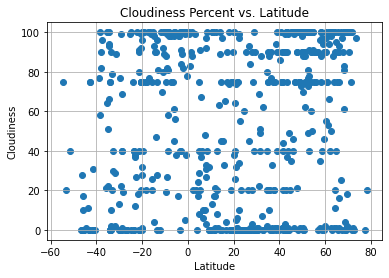

In [82]:
# Scatter plot of max temp vs latitude for weather data after filtering out cities with humidity >100
x_lat=weather_data_df_one['Latitude']
y_cloudiness=weather_data_df_one['Cloudiness']

plt.scatter(x_lat, y_cloudiness)
plt.title('Cloudiness Percent vs. Latitude') #how to use % and ' in f string???
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Cloudiness.png')

print(f' The further one travels from the equator the less clouds you can expect.') 
print(f' Come back to this')

## Latitude vs. Wind Speed Plot

 Wind speed increases as distance from the equator increases.
 Wind speed is lowest near the equator. Wind appears to increase the further from the equator you go.


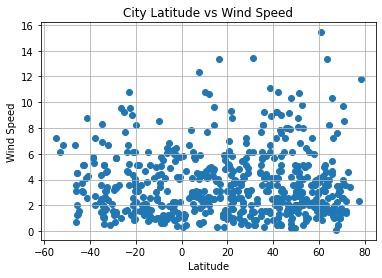

In [83]:
x_lat=weather_data_df_one['Latitude']
y_wind_speed=weather_data_df_one['Wind Speed']

plt.scatter(x_lat, y_wind_speed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Wind Speed.png')

print(f' Wind speed increases as distance from the equator increases.') 
print(f' Wind speed is lowest near the equator. Wind appears to increase the further from the equator you go.')

## Linear Regression

In [84]:
# latitude greater than 0 is northern
# latitude less than 0 is southern
# #print statement
# look in the read me file 

In [85]:
northern_hem_filter=weather_data_df_one.loc[:, "Latitude"]>=0 #on the equator included
northern_hem_df=weather_data_df_one.loc[northern_hem_filter,:]
northern_hem_df.describe()


,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,385.000000,385.000000,385.000000,385.000000,385.00000,385.00000,3.850000e+02
mean,39.064107,11.425945,275.561766,73.709091,52.00000,3.73013,1.611981e+09
std,20.092823,84.610842,18.801486,19.799346,40.45799,2.65699,6.760955e+01
min,0.516700,-173.300000,231.380000,19.000000,0.00000,0.09000,1.611980e+09
25%,22.075200,-68.591400,263.700000,62.000000,2.00000,1.75000,1.611981e+09
50%,41.587500,21.548200,279.150000,80.000000,61.00000,3.09000,1.611981e+09
75%,54.791400,76.833300,291.150000,88.000000,90.00000,4.83000,1.611981e+09
max,78.218600,179.316700,305.370000,100.000000,100.00000,15.43000,1.611981e+09


In [86]:
southern_hem_filter=weather_data_df_one.loc[:, "Latitude"]<0 #on the equator included
southern_hem_df=weather_data_df_one.loc[southern_hem_filter,:]
southern_hem_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,-22.113424,30.311845,295.964703,75.286486,54.918919,3.469243,1.611981e+09
std,13.562646,95.702105,6.057803,18.536951,38.856745,2.243788,7.847299e+01
min,-54.800000,-175.200000,279.150000,10.000000,0.000000,0.420000,1.611980e+09
25%,-33.650000,-55.131100,292.150000,67.000000,18.000000,1.540000,1.611981e+09
50%,-20.516700,25.570100,296.380000,79.000000,70.000000,3.090000,1.611981e+09
75%,-9.800000,132.750000,300.150000,89.000000,93.000000,5.140000,1.611981e+09
max,-0.600000,175.515300,315.150000,100.000000,100.000000,10.770000,1.611981e+09


In [87]:
len(southern_hem_df)
# this plus northern_hem_df should add up to your weather_data_df_one 

185

In [88]:
len(northern_hem_df)

385

The r-squared is: 0.00026685671929245925


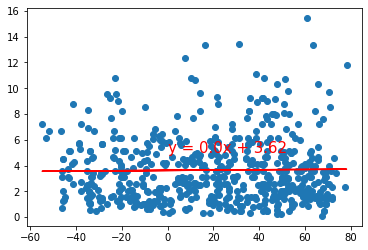

In [89]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

x_lat=weather_data_df_one['Latitude']
y_wind_speed=weather_data_df_one['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wind_speed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('')
plt.ylabel('')
print(f"The r-squared is: {rvalue**2}")
plt.show()


#slope, intercept, rvalue, pvalue, stderr = linregress(x, y) #list unpacking 
# y=mx+b #every straight line can be represented by this equation
#regression=slope+x+intercept
#regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')

#liner regression is trying to draw a line as close as possible to the most dots


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7510049771976302


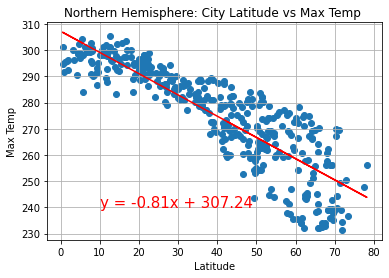

<Figure size 432x288 with 0 Axes>

In [90]:
x_lat=northern_hem_df['Latitude']
y_maxtemp=northern_hem_df['Max Temp']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_maxtemp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Max Temp ')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.xlim(0,90)
#plt.ylim(0,110)

plt.grid(True)
plt.show()

#=300-200
# based off this regression, we can expect the max temp 
plt.savefig('../WeatherPy/Northern_Latitude vs Max Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.27493573728126514


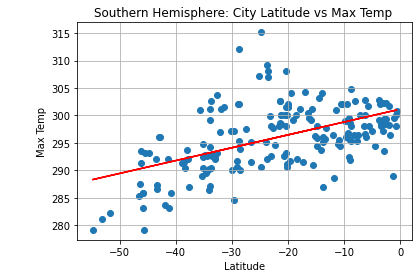

<Figure size 432x288 with 0 Axes>

In [91]:
x_lat=southern_hem_df['Latitude']
y_maxtemp=southern_hem_df['Max Temp']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_maxtemp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-70,288),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Max Temp ')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.xlim(0,90)
#plt.ylim(0,110)

plt.grid(True)
plt.show()
#plt.savefig()
#find the line where you have the smallest distance between the point of the data set
plt.savefig('../WeatherPy/Southern_Latitude vs Max Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13836973618850062


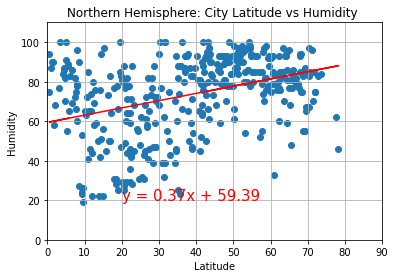

<Figure size 432x288 with 0 Axes>

In [92]:
x_lat=northern_hem_df['Latitude']
y_humidity=northern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_humidity)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
plt.xlim(0,90)
plt.ylim(0,110)
plt.grid(True)
plt.show()
plt.savefig('../WeatherPy/Northern_Latitude vs Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

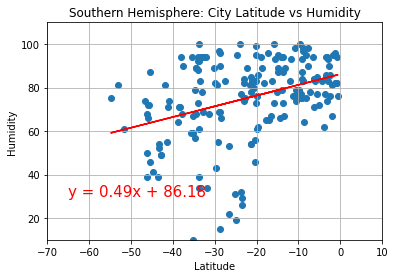

The r-squared is: 0.12995977158517488


In [93]:
x_lat=southern_hem_df['Latitude']
y_humidity=southern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_humidity)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-65,30),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot.xlim(min, max)
plt.xlim(-70,10)
plt.ylim(10,110)
plt.grid(True)
plt.show()

print(f"The r-squared is: {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0686997756751035


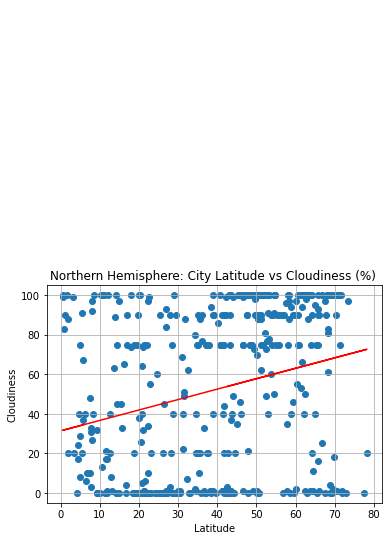

In [94]:
x_lat=northern_hem_df['Latitude']
y_cloudiness=northern_hem_df['Cloudiness']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloudiness)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Cloudiness (%) ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12995977158517488


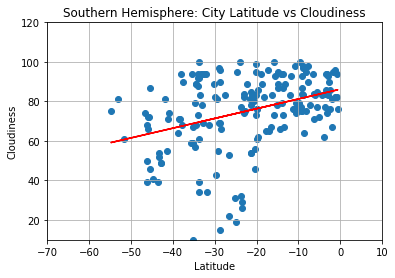

In [95]:
x_lat=southern_hem_df['Latitude']
y_cloudiness=southern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloudiness)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-75,50),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
plt.xlim(-70,10)
plt.ylim(10,120)
plt.grid(True)
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00044791966493400127


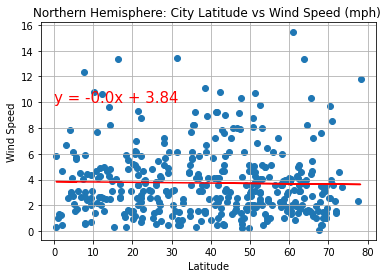

In [96]:
x_lat=northern_hem_df['Latitude']
y_wind_speed=northern_hem_df['Wind Speed']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wind_speed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Wind Speed (mph) ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01848316051212969


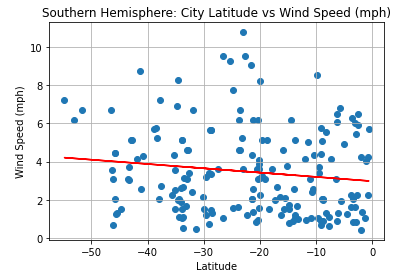

In [97]:
x_lat=southern_hem_df['Latitude']
y_wind_speed=southern_hem_df['Wind Speed']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wind_speed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-65,10),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
#plt.xlim(-70,10)
#plt.ylim(10,110)
plt.grid(True)
plt.show()